# Project 3 - Determining association between asthma and lung cancer

Sneha Ganguly        
A15177615

### Scientific Question: Does having an asthma diagnosis in patients increase the likelihood of developing lung cancer?

Asthma is a chronic lung disease that causes shortness of breath and wheezing via the activation of interleukins and cytokines that cause inflammation of the lung airway and production of excess mucus. Lung cancer is the top cause of cancer deaths in the US, characterized by long-term inflammation due to lesions on the organ. Asthma has a global prevalence of about 10 %, as a result, the chronic inflammatory conditions surrounding asthma may have an important role in lung cancer development (Coussens, et al.) Lung Cancer and Asthma are both associated with the pathogenic inflammation of the airways (Qu et al). As a result, an inflammatory response may mediate the link between asthma and lung cancer. 

Several studies have performed meta-analyses to understand the link between patients with asthma or other chronic lung diseases, however the association is controversial due to small sample datasets, which are usually limited to a single race or gender, as well as the presence of multiple variants in the samples. In this analysis, I use the occurence ratio data from multiple studies listed in Qu et al.  Since the studies add up to analysis on ~16 million samples across ages 16-75 years,races and genders, analysing the occurence ratios in the studies will help provide a comprehensive analysis between the link between asthma diagnosis and lung cancer occurence.

### Scientific Hypothesis: If having an asthma diagnosis has a positive risk association with lung cancer development, then it's occurence ratio (OR) across studies should be greater than 1.00.

Over 21 papers studying the association between asthma and lung cancer were identified from PubMed. Out of those studies, the ones with a well-defined population or large sample sizes were selected and saved as a csv file that was read in here for t-test and anova. We performed t-test and anova on the ORs. The OR for a disease is the ratio between the number of occurences in the affected group over the number of occurences in the control group. Therefore, having an OR>1 is said to be an indicator of a enhanced risk associated with a disease. The ORs were plotted using a boxplot. The boxplot spread and p-values were analyzed to demonstrate that asthma and lung cancer development are positively associated and that variants such as age, smoking history and history of other lung diseases do not affect asthma's ability to dispose a patient to eventually develop lung cancer.

To answer this scientific question and test my hypothesis, I first had to search PubMed for studies that performed meta-analyses on the association between asthma and lung cancer. Then, I selected my subset of studies and manually created an excel file with a table displaying the relevant information. I selected the data with primarily three variants - age, smoking habits, and the history of asthma, which have been found to have an impactful significance on  lung cancer diagnosis. Then, I saved my excel sheet as a csv file and imported the csv file here as a dataframe.

### Part 1: Load the packages

- SciPy: ecosystem for software related to STEM used to perform t-test and anova statistical analysis on data
- NumPy: library for programming arrays, matrices and elaborate mathematical functions used to perform numerical 
- Pandas: software for building dataframes for data analysis used to convert the csv file into a dataframe to use in the analysis
- Matplotlib: to visualize the data for the t-test and anova in the form of a boxplot

In [229]:
# Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_1samp

### Part 2: Load in the data and perform Bioinformatics Analyses (t-test & ANOVA)

A csv file is a comma separated values file that allows data to be saved in a tabular form. Since they are in plain text format, they are easier to organize large amounts of data and use on another database for easy import and export of data. 

A one sampled t-test helps us understand if the mean of a population is statistically different from the hypothesized value. An anova test helps analyze the means of different subgroups to provide us p-value tp show the relationship between the subgroups.

In this code, the data is read from the csv file and converted into a dataframe using pandas. The ORs of the data set and variant subgroups are saved as numpy arrays to be used for statistical analysis using scipy to give us the p-values. To determine if the OR values obtained from the studies indicated a statistically significant positive risk association, we performed a one-sample t-test to determine if OR>1. To determine whether lung cancer development in asthma patients is also enhanced by external variants such as age of population, smoking history and history of other lung diseases, an anova test was conducted between the ORs in those samples to see if these variants had any significant impact on lung cancer diagnosis besides asthma.

In [230]:
# Create Data Table
aslc_data=pd.read_csv(r"/Users/snehaganguly/Desktop/aslcdata.csv")

# Display to familiarize with abbreviations used
print("LC= lung cancer, OR= Occurence Ratio")
print("SR=Self-reported, RD=Registered Database, MQ= Mailed Questionnaire, PD= Physician Diagnosed")
print(" ")

# Display data
aslc_data[["First author","Age (y)", "AS Diagnosis","LC Diagnosis","Sample size","LC OR (95% CI)","Variants","Gender","Race","Year"]]

LC= lung cancer, OR= Occurence Ratio
SR=Self-reported, RD=Registered Database, MQ= Mailed Questionnaire, PD= Physician Diagnosed
 


,First author,Age (y),AS Diagnosis,LC Diagnosis,Sample size,LC OR (95% CI),Variants,Gender,Race,Year
0,Alderson,> 25,SR,RD,1892,0.80,Age,Mixed,Mixed,1974
1,Boffetta,> 20,RD,RD,92986,1.58,Age,Mixed,Caucasian,2002
2,Brown,> 50,SR,SR,8896,2.10,"Age, Smoking",Mixed,Mixed,2006
3,Colak,> 56,SR,RD,94097,4.00,"Age, Smoking",Mixed,Mixed,2015
4,Eriksson,> 16,PD,RD,6593,0.58,"Age, Smoking, Lung Diseases",Mixed,Caucasian,1995
5,Fan,> 40,PD,RD,9295,1.27,"Age, Smoking",Mixed,Asian,2016
6,Gonzalez-Perez,> 20,SR,MQ,18792,1.35,"Age, Smoking",Mixed,Mixed,2006
7,Huang,> 20,RD,RD,15219024,1.31,"Smoking, Lung Diseases",Mixed,Asian,2015
8,Huovinen,> 18,SR,RD,14654,2.36,"Age, Smoking, Lung Diseases",Male,Caucasian,1997
9,Littman,> 44,SR,RD,17698,1.02,"Smoking, Lung Diseases",Mixed,Mixed,2004


#### T-test to see if the positive association between asthma and lung cancer is statistically significant

 - Hypothesis: Most studies show that asthma patients aged 16-75 years are likely to develop lung cancer (have OR  > 1.00)
 - Null hypothesis: p < 1.00

In [231]:
# Since we are trying to see if most patients develop cancer, we set propmean as 1.00
tset,pval = ttest_1samp(aslc_or,1.00)
print('t-score:',tset)

# We need 1-tailed t-test for the greater than analysis, since python default is 2-tailed, we need to divide pval by 2
p_val=pval/2
print('p-value:',p_val) 

# Conditional display result depending on p-value
# Alpha value is 0.05 for 95% CI
if pval < 0.05:    
    print('we are rejecting null hypothesis')
    print('Most asthma patients aged 16-75 years are likely to develop lung cancer')
else:
    print('we are accepting null hypothesis')

t-score: 2.274601941490448
p-value: 0.02104337450524134
we are rejecting null hypothesis
Most asthma patients aged 16-75 years are likely to develop lung cancer


#### Anova test to see variance between the variant subgroups

In [232]:
# Selecting the sub groups for anova test from data table based on index
one_var=aslc_data.iloc[[0,1,10],5]
two_var=aslc_data.iloc[[2,3,5,6,7,9,12],5]
three_var=aslc_data.iloc[[4,8,11],5]

#Performing actual f-test
F, p = stats.f_oneway(one_var,two_var,three_var)

# Seeing if the overall model is significant (p<0.05)
print('F-Statistic=%f, p=%f' % (F, p))

# Show results depending on p-value
if p < 0.05:    
    print('we are rejecting null hypothesis')
    print("There is a significant difference between the three groups")
else:
    print('we are accepting null hypothesis')
    print("There isn't a significant difference between the three groups")

F-Statistic=0.461622, p=0.643046
we are accepting null hypothesis
There isn't a significant difference between the three groups


### Part 3: Creating a boxplot to display the distribution of data

Here we use matplotlib to create two boxplots that will be printed out below. The x values will be labeled based on the values in "LC OR (95% CI)" and the y values will be labeled based on the subgroup being displayed. The patch colors, x and y ticks are added and the boxplots are saved and displayed. 

Boxplots are a data visualization technique used for viewing the distribution of data around the median, quartiles, and extremes while displaying the outliers. Boxplots of different datasets can be compared to compare the location of the respective medians and also the spread of the values around the median. They can also help identify outliers and if the data is skewed or weighted. This sort of plot can help us compare the data, especially for the anova, and determine the relationship between the ORs.

#### Boxplot to Display OR data distribution

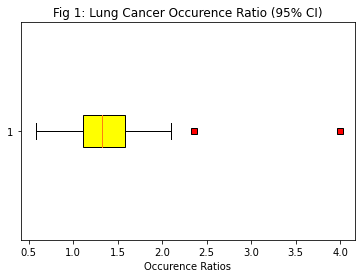

In [233]:
# Creating dataset for boxplot
aslc_or=aslc_data["LC OR (95% CI)"]
bp=plt.boxplot(aslc_or,vert=False, flierprops=red_square,patch_artist = True)

## Plot customization
# For-loop to assign color to boxplot
colors = ['#FFFF00']
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 

# Adding title and x axis label
plt.title('Fig 1: Lung Cancer Occurence Ratio (95% CI)')
plt.xlabel('Occurence Ratios')

# Save a PNG file with the boxplot 
plt.savefig('LCORData.png')

# Display plot
plt.show()

#### Boxplot to display variance in OR per variance group

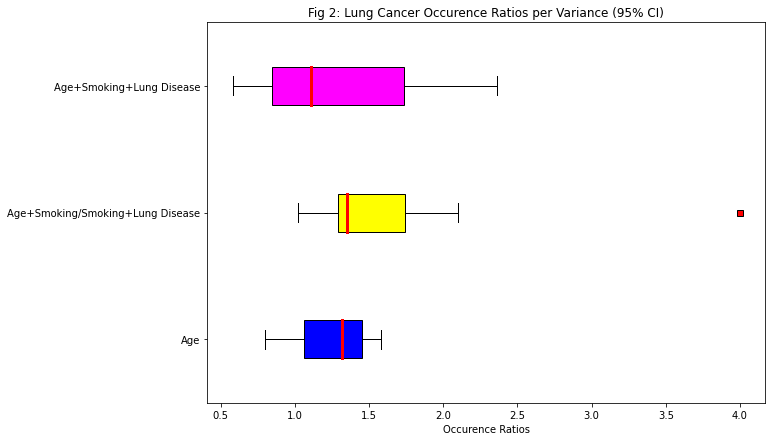

In [234]:
# Creating dataset 
np.random.seed(10) # For reproducibility
data_1 = one_var 
data_2 = two_var
data_3 = three_var
data = [data_1, data_2, data_3] 

# Setting the figure  
fig = plt.figure(figsize =(10, 7)) 
aslc = fig.add_subplot(111) 

# Creating horizontal boxplot with outliers in red
bpan = aslc.boxplot(data, patch_artist = True, flierprops=red_square, vert = False) 
  
# Changing color of boxplots
colors = ['#0000FF', '#FFFF00', '#FF00FF'] 

# For-loop to change color of boxplots sequentially
for patch, color in zip(bpan['boxes'], colors): 
    patch.set_facecolor(color) 

# Changing color and linewidth of medians 
for median in bpan['medians']: 
    median.set(color ='red', 
               linewidth = 3)
      
# Adding title  
plt.title("Fig 2: Lung Cancer Occurence Ratios per Variance (95% CI)") 

# Adding x-axis label 
plt.xlabel('Occurence Ratios')

# Adding y-axis labels 
aslc.set_yticklabels(['Age', 'Age+Smoking/Smoking+Lung Disease',  
                    'Age+Smoking+Lung Disease']) 
  
# Removing top axes and right axes 
# ticks 
aslc.get_xaxis().tick_bottom() 
aslc.get_yaxis().tick_left() 

# Save a PNG file with the boxplot 
plt.savefig('LCORVarianceData.png')
      
# Display plot 
plt.show(bpan) 

### Part 4: Analysis of the Results

The boxplots in Fig 1 and 2 show the distribution of all the occurenct ratios from the 12 studies. The x-axis shows the occurence ratios of lung cancer and the y axis in Fig 2 shows the subgroups. The red line passing through the middle of the boxplots represent the median values of the OR for the data subset. The edges of the boxplots represent the quartiles and the edges of the whiskers represent the minimum and maximum OR values. The red squares indicate outliers in our data. Boxplots exclude outliers as standard deviations are very sensitive to outliers and they can misrepresent the data distribution.

Fig 1 shows that the lower quartile OR value of the data is above 1.00 which shows that most of the ORs in the study show a positive risk association between asthma and lung cancer. The p-value for the t-test is with propmean = 1.00 is <0.05 which further confirms our finding as statistically significant.

Fig 2 shows that the median OR values for the subgroups are within 1.0-1.5. Additionally, the data for one variant and two variants are very compacted, whereas the data for the three variants is widely distributed. The location of the boxplot for three variants is interesting and unexpected as one would expect three variants to heavily impact lung cancer incidence and give a higher median OR value. The wide spread is understandable as different variants can have different combined effects on patients and their likelihood to develop lung cancer. Nevertheless, the data distribution of all three variant subgroups indicate a strong positive association. This finding is further confirmed by the p-value for the anova (>0.05) which indicates that there is no statistically significant difference between the OR values of the three subgroups. This confirms that asthma has a significant impact out of these variants on lung cancer development in patients despite their age, smoking habits or history of lung diseases.

Thus, my hypothesis is correct and there is statistically significant positive risk association of lung cancer development in patients diagnosed with asthma.